In [17]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np
import matplotlib.pyplot as plt
import hist

NanoAODSchema.warn_missing_crossrefs = False

In [18]:
#fname = "/Users/siddhesh/Work/CMS/htoaa/NanoAOD/SUSY_ZH_ZToAll_HToAATo4B_Pt150_M-All_TuneCP5_13TeV_madgraph_pythia8/r1/PNet_v1.root"
fname = "/Users/siddhesh/Work/CMS/htoaa/NanoAOD/SUSY_ZH_ZToAll_HToAATo4B_Pt150_M-All_TuneCP5_13TeV_madgraph_pythia8/r1/PNet_v*.root"
fIpNames = [
    "/Users/siddhesh/Work/CMS/htoaa/NanoAOD/SUSY_ZH_ZToAll_HToAATo4B_Pt150_M-All_TuneCP5_13TeV_madgraph_pythia8/r1/PNet_v1.root",
    #"/Users/siddhesh/Work/CMS/htoaa/NanoAOD/SUSY_WH_WToAll_HToAATo4B_Pt150_M-All_TuneCP5_13TeV_madgraph_pythia8/r1/PNet_v1.root"
]
events = None
for fIpName in fIpNames:
    events_i  = NanoEventsFactory.from_root(fIpName).events()
    if fIpName == fIpNames[0]:
        events  = events_i
    else:   
        events = ak.concatenate([events, events_i], axis=0)

#ak.count( events, axis=0)

In [19]:
len(events)
print(f"{events[:3]}")

[<event 1:5:31047>, <event 1:5:31038>, <event 1:5:31075>]


mask_Zvv = <Array [False, False, False, ... False, False] type='671948 * bool'>, ak.sum(mask_Zvv) = 20088, ak.argsort(events.FatJet[mask_Zvv].nBHadrons, ascending=False) = <Array [[0], [0, 1], [0], ... [0], [0], [0]] type='20088 * var * int64'> FJ4b_pTRank_Zvv = <Array [0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0] type='20088 * ?int64'>


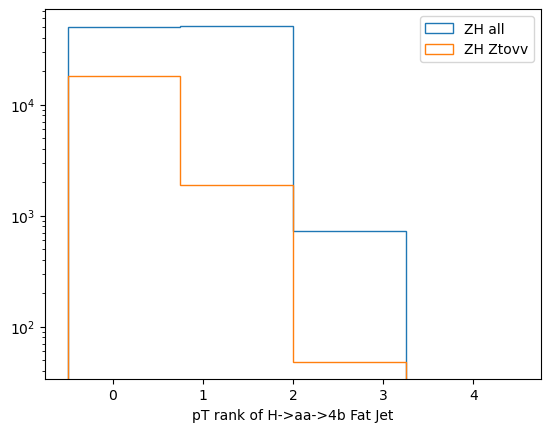

/var/folders/2l/c4141kzj2r34tjwfn3fh6nd40000gr/T/ipykernel_99166/238285646.py:30: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  axs.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


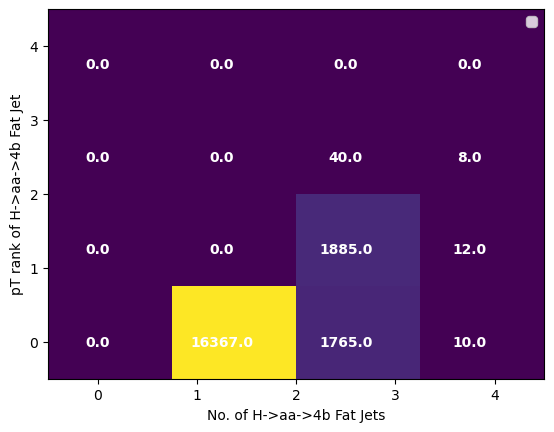

/var/folders/2l/c4141kzj2r34tjwfn3fh6nd40000gr/T/ipykernel_99166/238285646.py:45: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  axs.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ak.argsort(events.FatJet[mask_Zvv].nBHadrons, ascending=False) = <Array [[0], [0, 1], [0], ... [0], [0], [0]] type='20088 * var * int64'>
events.FatJet[mask_Zvv].nBHadrons[ak.argsort(events.FatJet[mask_Zvv].nBHadrons, ascending=False)] = <Array [[4], [4, 2], [4], ... [4], [4], [4]] type='20088 * var * uint8[parameter...'>
events.FatJet[mask_Zvv].nBHadrons[ak.argsort(events.FatJet[mask_Zvv].nBHadrons, ascending=False)][:, 0] = <Array [4, 4, 4, 4, 4, 4, ... 4, 4, 4, 4, 4, 4] type='20088 * uint8[parameters={...'>


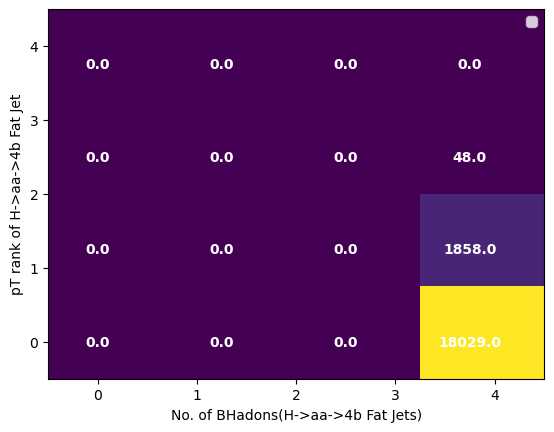

/var/folders/2l/c4141kzj2r34tjwfn3fh6nd40000gr/T/ipykernel_99166/238285646.py:57: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  axs.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


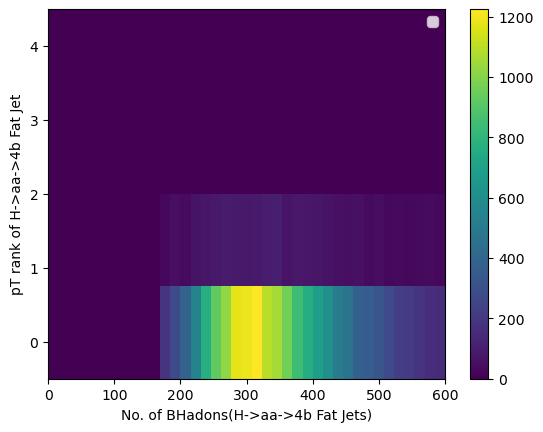

In [20]:
### Studying FatJet H->aa->4b in ZH_Htoaato4b_zto2nu channel:
mask_FJ4b = ak.any( (
    (events.FatJet.nBHadrons >= 4) &    
    (abs(events.FatJet.eta) < 2.4) & 
    (events.FatJet.jetId >= 6)
    ), axis=1)
FJ4b_pTRank = ak.firsts( ak.argsort(events.FatJet[mask_FJ4b].nBHadrons, ascending=False) )
mask_Zvv = ak.any( (
    (events.FatJet.nBHadrons >= 4) &    
    (abs(events.FatJet.eta) < 2.4) & 
    (events.FatJet.jetId >= 6) & 
    (events.MET.pt > 170)
    ), axis=1)
FJ4b_pTRank = ak.firsts( ak.argsort(events.FatJet[mask_FJ4b].nBHadrons, ascending=False) )
FJ4b_pTRank_Zvv = ak.firsts( ak.argsort(events.FatJet[mask_Zvv].nBHadrons, ascending=False) )
print(f"{mask_Zvv = }, {ak.sum(mask_Zvv) = }, {ak.argsort(events.FatJet[mask_Zvv].nBHadrons, ascending=False) = } {FJ4b_pTRank_Zvv = }")

fig, axs = plt.subplots()
axs.hist(FJ4b_pTRank, bins=np.linspace(-0.5,4.5,5), histtype='step', label='ZH all')
axs.hist(FJ4b_pTRank_Zvv, bins=np.linspace(-0.5,4.5,5), histtype='step', label='ZH Ztovv')
axs.set_xlabel('pT rank of H->aa->4b Fat Jet')
axs.set_yscale("log")
axs.legend()
plt.show()

fig, axs = plt.subplots()
hist_, xbins, ybins, im  = axs.hist2d(ak.count(ak.argsort(events.FatJet[mask_Zvv].nBHadrons, ascending=False), axis=1), FJ4b_pTRank_Zvv, bins=[np.linspace(-0.5,4.5,5), np.linspace(-0.5,4.5,5)],label='ZH Ztovv')
axs.set_xlabel('No. of H->aa->4b Fat Jets')
axs.set_ylabel('pT rank of H->aa->4b Fat Jet')
axs.legend()
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        axs.text(xbins[j]+0.5,ybins[i]+0.5, hist_.T[i,j], 
                color="w", ha="center", va="center", fontweight="bold")
plt.show()

print(f"{ak.argsort(events.FatJet[mask_Zvv].nBHadrons, ascending=False) = }")
print(f"{events.FatJet[mask_Zvv].nBHadrons[ak.argsort(events.FatJet[mask_Zvv].nBHadrons, ascending=False)] = }")
print(f"{events.FatJet[mask_Zvv].nBHadrons[ak.argsort(events.FatJet[mask_Zvv].nBHadrons, ascending=False)][:, 0] = }")

fig, axs = plt.subplots()
hist_, xbins, ybins, im  = axs.hist2d( events.FatJet[mask_Zvv].nBHadrons[ak.argsort(events.FatJet[mask_Zvv].nBHadrons, ascending=False)][:, 0], FJ4b_pTRank_Zvv, bins=[np.linspace(-0.5,4.5,5), np.linspace(-0.5,4.5,5)],label='ZH Ztovv')
axs.set_xlabel('No. of BHadons(H->aa->4b Fat Jets)')
axs.set_ylabel('pT rank of H->aa->4b Fat Jet')
axs.legend()
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        axs.text(xbins[j]+0.5,ybins[i]+0.5, hist_.T[i,j], 
                color="w", ha="center", va="center", fontweight="bold")
plt.show()

fig, axs = plt.subplots()
hist_, xbins, ybins, im  = axs.hist2d( events.FatJet[mask_Zvv].pt[ak.argsort(events.FatJet[mask_Zvv].nBHadrons, ascending=False)][:, 0], FJ4b_pTRank_Zvv, bins=[np.linspace(0,600,40), np.linspace(-0.5,4.5,5)],label='ZH Ztovv')
axs.set_xlabel('No. of BHadons(H->aa->4b Fat Jets)')
axs.set_ylabel('pT rank of H->aa->4b Fat Jet')
#axs.set_zsc
axs.legend()
fig.colorbar(im, ax=axs)
plt.show()

In [21]:
mask_sig = (
    (events.FatJet.nBHadrons[:, 0] >= 4) &
    (abs(events.FatJet.eta[:, 0]) < 2.4) & 
    (events.FatJet.jetId[:, 0] >= 6) &
    (events.MET.pt > 170) &
    (abs(events.FatJet[:,0].delta_phi(events.MET)) > 1.57)
)
#plt.hist2d(events.MET.pt[mask_sig], abs(events.FatJet[:,0].delta_phi(events.MET)[mask_sig]), bins=(np.linspace(0,800,40), np.linspace(0,3.14, 40)) )

xbins = array([7.22881869, 7.47032244, 7.71182619, 7.95332994, 8.19483369,
       8.43633744, 8.67784119, 8.91934494, 9.16084869, 9.40235244,
       9.64385619])
ybins = array([7.22881869, 7.47032244, 7.71182619, 7.95332994, 8.19483369,
       8.43633744, 8.67784119, 8.91934494, 9.16084869, 9.40235244,
       9.64385619])
hist_ = array([[4.000e+00, 2.100e+01, 1.900e+01, 1.100e+01, 3.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.200e+01, 1.490e+02, 1.750e+02, 1.000e+02, 2.900e+01, 5.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [3.600e+01, 2.910e+02, 5.630e+02, 3.890e+02, 1.090e+02, 1.900e+01,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
       [3.800e+01, 2.470e+02, 6.980e+02, 1.305e+03, 6.190e+02, 1.060e+02,
        8.000e+00, 3.000e+00, 0.000e+00, 0.000e+00],
       [3.100e+01, 1.590e+02, 3.690e+02, 9.980e+02, 1.726e+03, 5.210e+02,
        7.100e+01, 1.300e+01, 3.000e+00, 0.000e+00],
       [2.400e+01, 9.600e+01, 1.6

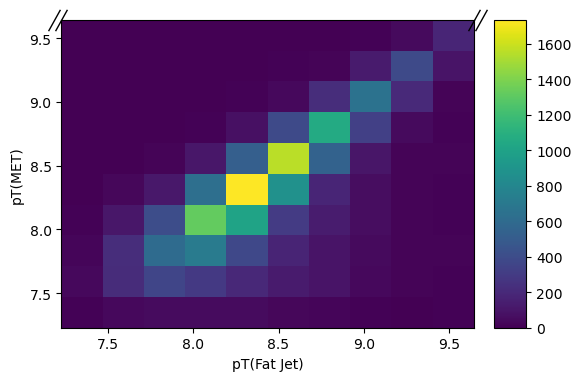

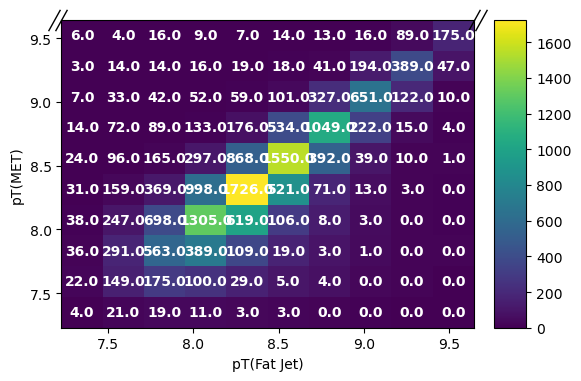

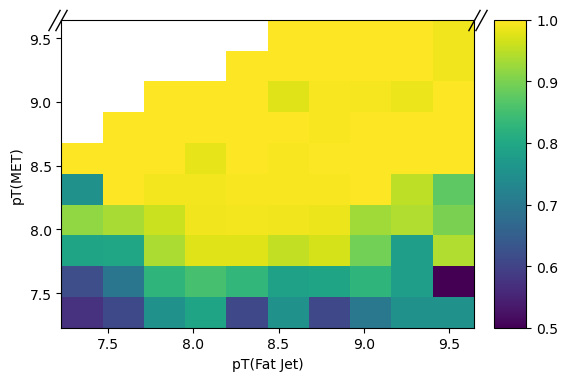

In [47]:
hFatJetPtVsMetPt_sig = hist.Hist(hist.axis.Regular(10,np.log2(150),np.log2(800), label='pT(Fat Jet)'), hist.axis.Regular(10,np.log2(150),np.log2(800), label='pT(MET)'))
hFatJetPtVsMetPt_trg = hist.Hist(hist.axis.Regular(10,np.log2(150),np.log2(800), label='pT(Fat Jet)'), hist.axis.Regular(10,np.log2(150),np.log2(800), label='pT(MET)'))

hFatJetPtVsMetPt_sig.fill(np.log2(events.FatJet.pt[:, 0][mask_sig]), np.log2(events.MET.pt[mask_sig]))


mask_trgSel = (
    (events.HLT['MonoCentralPFJet80_PFMETNoMu120_PFMHTNoMu120_IDTight'])
)
hFatJetPtVsMetPt_trg.fill(np.log2(events.FatJet.pt[:, 0][mask_sig & mask_trgSel]), np.log2(events.MET.pt[mask_sig & mask_trgSel]))

fig1, axs1 = plt.subplots(figsize=(6, 4))
hFatJetPtVsMetPt_sig.plot2d(ax=axs1)
fig2, axs2 = plt.subplots(figsize=(6, 4))
hFatJetPtVsMetPt_trg.plot2d(ax=axs2)

xbins = hFatJetPtVsMetPt_trg.axes[0].edges
ybins = hFatJetPtVsMetPt_trg.axes[1].edges
hist_ = hFatJetPtVsMetPt_trg.values()

print(f"{xbins = }")
print(f"{ybins = }")
print(f"{hist_ = }")

# set bin center
xbins = (xbins[:-1] + xbins[1:])/2
ybins = (ybins[:-1] + ybins[1:])/2
print(f"{xbins = }")
print(f"{ybins = }")
print(f"{hist_ = }")

for i in range(len(ybins)):
    for j in range(len(xbins)):
        axs2.text(xbins[j],ybins[i], hist_[i,j], #hist_.T[i,j], 
                color="w", ha="center", va="center", fontweight="bold")
        

hFatJetPtVsMetPt_trgEffi = hFatJetPtVsMetPt_trg / hFatJetPtVsMetPt_sig
fig3, axs3 = plt.subplots(figsize=(6, 4))
hFatJetPtVsMetPt_trgEffi.plot2d(ax=axs3)

print(f"{type(hFatJetPtVsMetPt_sig)}")

In [48]:
def plot2d_colztext(h): # hist.Hist object
    fig_, ax_ = plt.subplots()
    ax_.set_aspect("equal")
    hist, xbins, ybins, im = ax_.hist2d(x,y, bins=range(6))

    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            ax_.text(xbins[j]+0.5,ybins[i]+0.5, hist.T[i,j], 
                    color="w", ha="center", va="center", fontweight="bold")

    plt.show()

In [66]:
def plot2d_Hist(h_, drawOptions='', text_precision='', sTitle=''):
    hTmp_ = hist.Hist()
    if type(h_) != type(hTmp_): 
        print(f"Histogram h ({type(h_)}) is not hist. object")
        return
    
    fig2, axs2 = plt.subplots(figsize=(6, 4))
    h_.plot2d(ax=axs2)
    axs2.set_title(sTitle)

    if 'text' in drawOptions.lower():
        xbins = h_.axes[0].edges
        ybins = h_.axes[1].edges
        hist_ = h_.values()  
        # set bin center
        xbins = (xbins[:-1] + xbins[1:])/2
        ybins = (ybins[:-1] + ybins[1:])/2    
        for iY in range(len(ybins)):
            for iX in range(len(xbins)):
                sText = text_precision % (hist_[iX,iY])
                axs2.text(xbins[iX],ybins[iY], sText, #hist_.T[i,j], 
                        color="w", ha="center", va="center", fontweight="bold")

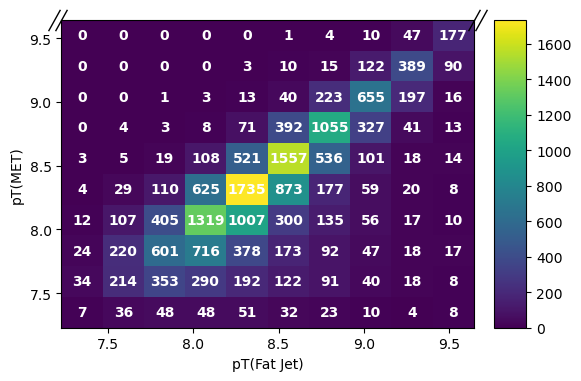

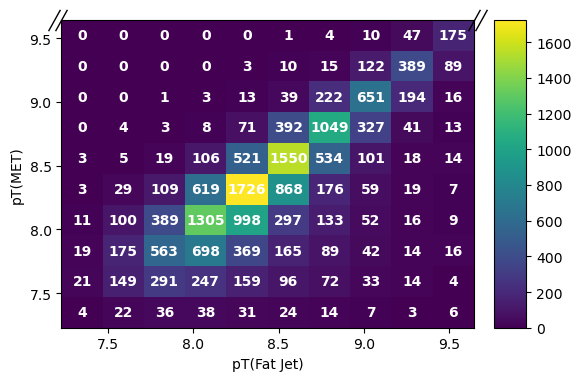

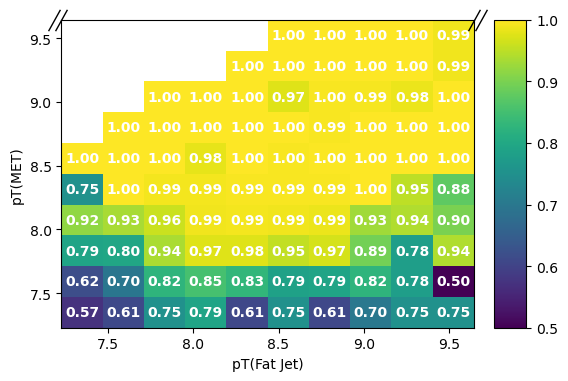

In [67]:
plot2d_Hist(hFatJetPtVsMetPt_sig, 'text', '%.0f')
plot2d_Hist(hFatJetPtVsMetPt_trg, 'text', '%.0f')
plot2d_Hist(hFatJetPtVsMetPt_trgEffi, 'text', '%.2f')

HLT_DiJet110_35_Mjj650_PFMET110: 0.06
HLT_MonoCentralPFJet80_PFMETNoMu120_PFMHTNoMu120_IDTight: 0.97
HLT_PFMET110_PFMHT110_IDTight_CaloBTagDeepCSV_3p1: 0.94
HLT_PFMET120_PFMHT120_IDTight_PFHT60: 0.98
HLT_PFMET120_PFMHT120_IDTight: 0.97
HLT_PFMET200_HBHE_BeamHaloCleaned: 0.84
HLT_PFMETNoMu120_PFMHTNoMu120_IDTight_PFHT60: 0.98
HLT_PFMETNoMu120_PFMHTNoMu120_IDTight: 0.97
HLT_PFMETTypeOne140_PFMHT140_IDTight: 0.96
HLT_PFMETTypeOne200_HBHE_BeamHaloCleaned: 0.90
HLT_TripleJet110_35_35_Mjj650_PFMET110: 0.00


Trigger efficiency: 
0.06  HLT_DiJet110_35_Mjj650_PFMET110 
0.97  HLT_MonoCentralPFJet80_PFMETNoMu120_PFMHTNoMu120_IDTight 
0.94  HLT_PFMET110_PFMHT110_IDTight_CaloBTagDeepCSV_3p1 
0.98  HLT_PFMET120_PFMHT120_IDTight_PFHT60 
0.97  HLT_PFMET120_PFMHT120_IDTight 
0.84  HLT_PFMET200_HBHE_BeamHaloCleaned 
0.98  HLT_PFMETNoMu120_PFMHTNoMu120_IDTight_PFHT60 
0.97  HLT_PFMETNoMu120_PFMHTNoMu120_IDTight 
0.96  HLT_PFMETTypeOne140_PFMHT140_IDTight 
0.90  HLT_PFMETTypeOne200_HBHE_BeamHaloCleaned 


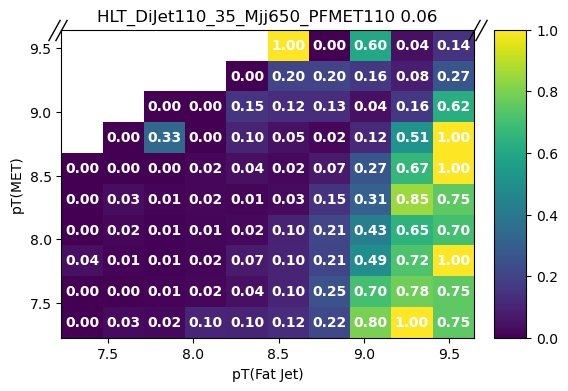

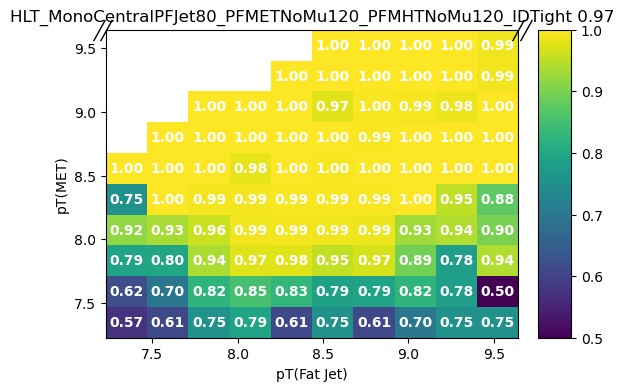

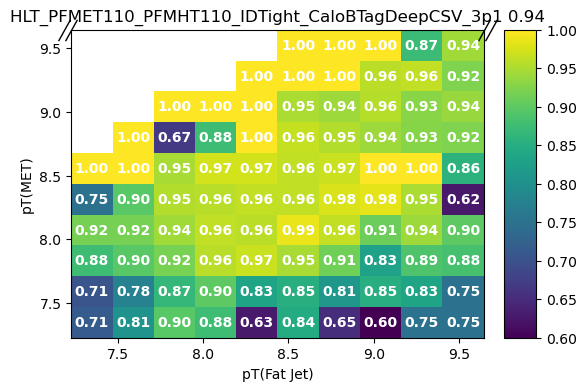

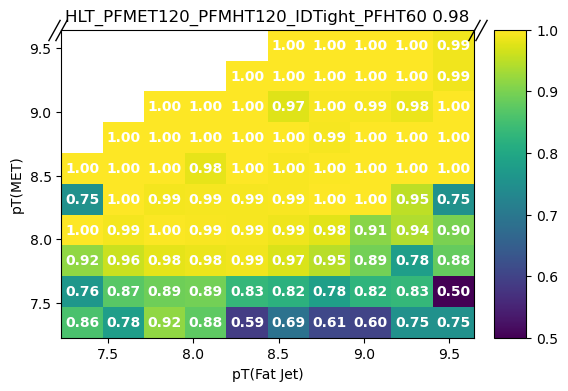

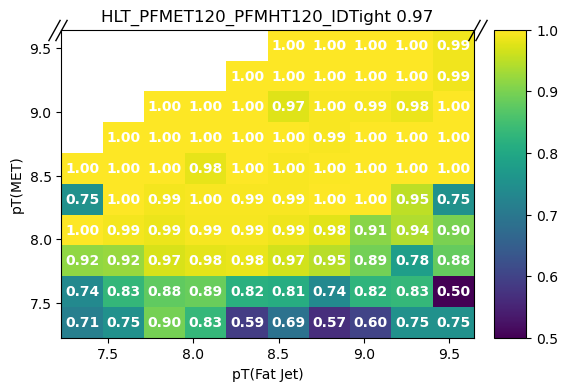

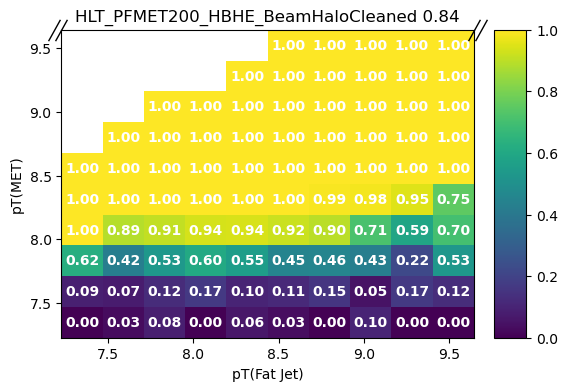

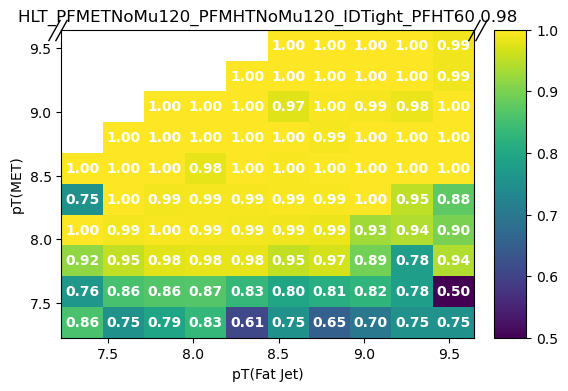

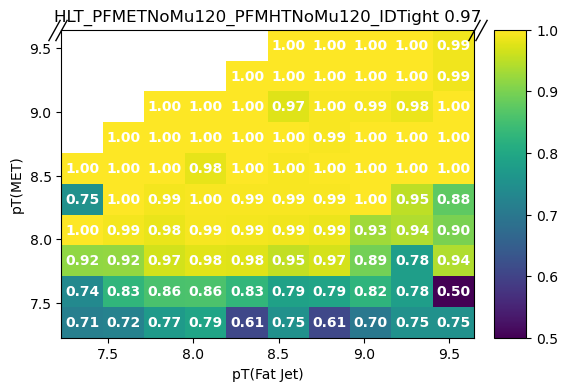

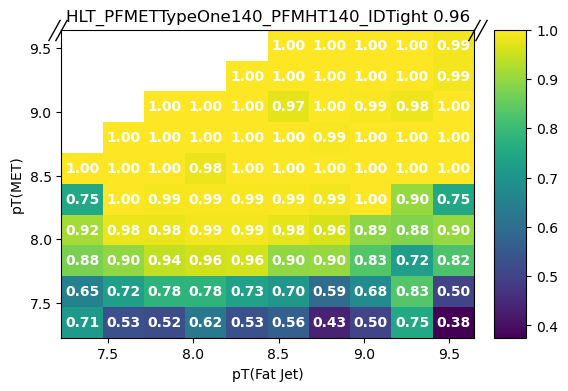

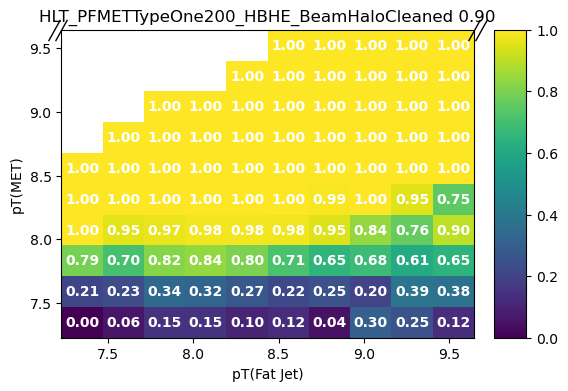

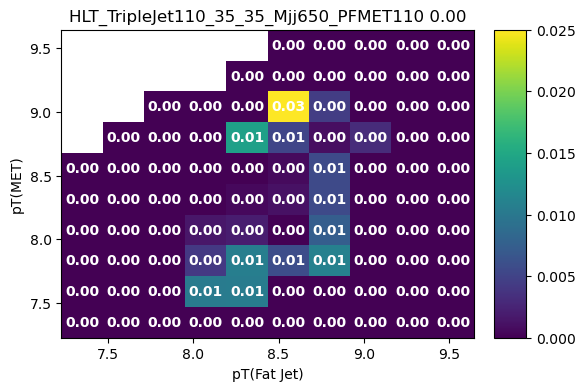

In [81]:
#def calTrgEffi_ZH_Htoaa_Zto2v(events, trgs_dict, sTrgs):
def calTrgEffi_ZH_Htoaa_Zto2v(trgs_dict, sTrgs):
    mask_sig = (
        (events.FatJet.nBHadrons[:, 0] >= 4) &
        (abs(events.FatJet.eta[:, 0]) < 2.4) & 
        (events.FatJet.jetId[:, 0] >= 6) &
        (events.MET.pt > 170) &
        (abs(events.FatJet[:,0].delta_phi(events.MET)) > 1.57)
    )

    mask_Trgs = np.full(len(events), False)
    for HLTName, L1TList in trgs_dict.items():
        HLTName_toUse = HLTName.replace('HLT_', '')
        mask_HLT = events.HLT[HLTName_toUse] == True

        if len(L1TList) > 0:
            mask_L1Ts = np.full(len(events), False)
            for L1TName in L1TList:
                L1TName_toUse = L1TName.replace('L1_', '')
                mask_L1T_i = events.L1[L1TName_toUse] == True
                mask_L1Ts = (mask_L1Ts | mask_L1T_i) # any one of the L1T triggers associated to HLT path should be fired
        else:
            mask_L1Ts = np.full(len(events), True)

        mask_Trg_i = (mask_HLT & mask_L1Ts) # HLT path and any of the associated L1T seed should be fired
        mask_Trgs = (mask_Trgs | mask_Trg_i) # Any of the HLT trigger should be fired

    # trigger efficiency
    trgEffi = len(events[(mask_sig & mask_Trgs)]) / len(events[(mask_sig)])

    hFatJetPtVsMetPt_sig = hist.Hist(hist.axis.Regular(10,np.log2(150),np.log2(800), label='pT(Fat Jet)'), hist.axis.Regular(10,np.log2(150),np.log2(800), label='pT(MET)'))
    hFatJetPtVsMetPt_trg = hist.Hist(hist.axis.Regular(10,np.log2(150),np.log2(800), label='pT(Fat Jet)'), hist.axis.Regular(10,np.log2(150),np.log2(800), label='pT(MET)'))

    hFatJetPtVsMetPt_sig.fill(np.log2(events.FatJet.pt[:, 0][mask_sig]), np.log2(events.MET.pt[mask_sig]))
    hFatJetPtVsMetPt_trg.fill(np.log2(events.FatJet.pt[:, 0][mask_sig & mask_Trgs]), np.log2(events.MET.pt[mask_sig & mask_Trgs]))
    hFatJetPtVsMetPt_trgEffi = hFatJetPtVsMetPt_trg / hFatJetPtVsMetPt_sig

    plot2d_Hist(hFatJetPtVsMetPt_trgEffi, drawOptions='text', text_precision='%.2f', sTitle="%s %.2f"%(sTrgs,trgEffi))
    sResult = "%.2f  %s \n" % (trgEffi, sTrgs) # "{sTrgs}: {trgEffi:.2f} \n"
    print(f"{sTrgs}: {trgEffi:.2f}")
    return sResult

triggers_allComb_dict = {
    "HLT_DiJet110_35_Mjj650_PFMET110": {
        "HLT_DiJet110_35_Mjj650_PFMET110": [],
    },
    "HLT_MonoCentralPFJet80_PFMETNoMu120_PFMHTNoMu120_IDTight": {
        "HLT_MonoCentralPFJet80_PFMETNoMu120_PFMHTNoMu120_IDTight": [],
    },
    "HLT_PFMET110_PFMHT110_IDTight_CaloBTagDeepCSV_3p1": {
        "HLT_PFMET110_PFMHT110_IDTight_CaloBTagDeepCSV_3p1": [],
    },
    "HLT_PFMET120_PFMHT120_IDTight_PFHT60": {
        "HLT_PFMET120_PFMHT120_IDTight_PFHT60": [],
    },
    "HLT_PFMET120_PFMHT120_IDTight": {
        "HLT_PFMET120_PFMHT120_IDTight": [],
    },
    "HLT_PFMET200_HBHE_BeamHaloCleaned": {
        "HLT_PFMET200_HBHE_BeamHaloCleaned": [],
    },
    "HLT_PFMETNoMu120_PFMHTNoMu120_IDTight_PFHT60": {
        "HLT_PFMETNoMu120_PFMHTNoMu120_IDTight_PFHT60": [],
    },
    "HLT_PFMETNoMu120_PFMHTNoMu120_IDTight": {
        "HLT_PFMETNoMu120_PFMHTNoMu120_IDTight": [],
    },
    "HLT_PFMETTypeOne140_PFMHT140_IDTight": {
        "HLT_PFMETTypeOne140_PFMHT140_IDTight": [],
    },
    "HLT_PFMETTypeOne200_HBHE_BeamHaloCleaned": {
        "HLT_PFMETTypeOne200_HBHE_BeamHaloCleaned": [],
    },
    "HLT_TripleJet110_35_35_Mjj650_PFMET110": {
        "HLT_TripleJet110_35_35_Mjj650_PFMET110": [],
    },
    
    
    
    
    

    #"": {
    #    "": [],
    #},
    
}

sResults = ''
for sTrgs, triggers_dict in triggers_allComb_dict.items():
    sResults += calTrgEffi_ZH_Htoaa_Zto2v(trgs_dict=triggers_dict,  sTrgs=sTrgs)
print("\n\nTrigger efficiency: \n%s" % sResults)



